In [17]:
from math import *
import random

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [142]:
intervalsNum = 20
numberQuantity = 200 * intervalsNum
Lambda = 0.03

In [143]:
def ExponentialDistribution(numberQuantity,intervalsNum,Lambda):
    x_model = np.random.uniform(0, 1, (numberQuantity))
    x_real = np.linspace(0, 1, numberQuantity)

    y_model = -1 / Lambda * np.log(x_model)
    y_real = Lambda * np.exp(-Lambda * x_real * 260)

    dy = (y_model.max() - y_model.min()) / intervalsNum

    y_model_mid = np.array([(i * dy + dy) / 2 for i in range(0, intervalsNum)])
    p_i = np.array([y_model[(y_model > i * dy) & (y_model < i * dy + dy)].size / numberQuantity for i in range(0, intervalsNum)])
    h_i = p_i / dy

    return (y_model_mid,h_i),(x_real,y_real),(dy,p_i)

ModelPltData_exp, RealPltData_exp, dy_And_P_i_exp =  ExponentialDistribution(numberQuantity,intervalsNum,Lambda)

In [144]:
y_model_mean_exp = (ModelPltData_exp[1]*ModelPltData_exp[0]).sum()/ModelPltData_exp[0].sum()
y_model_disp_exp = ((((ModelPltData_exp[1]-y_model_mean_exp)**2)*ModelPltData_exp[0]).sum())/ModelPltData_exp[0].sum()

y_real_mean_exp = RealPltData_exp[1].mean()
y_real_disp_exp = RealPltData_exp[1].std()**2

df_expDistr=pd.DataFrame(
    index=['Mean','Dispersion'],
    columns=['Model','Real','Delta']
)

df_expDistr.loc['Mean'] = (pd.Series([y_model_mean_exp,y_real_mean_exp,abs(y_model_mean_exp-y_real_mean_exp)],index=df_expDistr.columns))
df_expDistr.loc['Dispersion'] = (pd.Series([y_model_disp_exp,y_real_disp_exp,abs(y_model_disp_exp-y_real_disp_exp)],index=df_expDistr.columns))

display(df_expDistr)

,Model,Real,Delta
Mean,0.001274,0.003847,0.002574
Dispersion,0.00001,0.000043,0.000033


In [145]:
dy = dy_And_P_i_exp[0]
# for exponential distribution probability to catch at [a,b] P = e^(-Lambda * a) - e^(-Lambda * b)
Pi = [exp(-Lambda*(i*dy))-exp(-Lambda*(i*dy+dy)) for i in range(0,intervalsNum)]
chi2_observe_exp = (((ModelPltData_exp[1]-Pi)**2)/Pi).sum()

# freedom degree = intervalsNum - r - 1 = 20 - 1 - 1
chi2_table_exp = 10.2

print('Вычисленное значение: ',round(chi2_observe_exp,3))
print('Табличное значение: ', chi2_table_exp)
if chi2_observe_exp < chi2_table_exp:
    print('Созданный генератор работает по показательному закону распределения случайной величниы')

Вычисленное значение:  0.84
Табличное значение:  10.2
Созданный генератор работает по показательному закону распределения случайной величниы


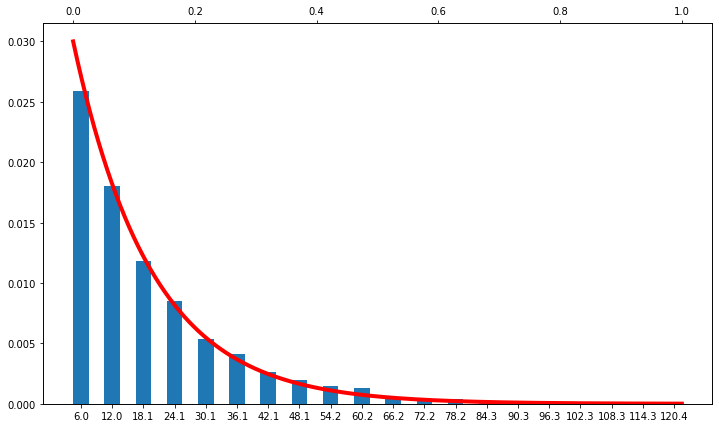

In [165]:
fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(111)
ax1.set_xticks(ModelPltData_exp[0])

ax2 = ax1.twiny()

ax1.bar(ModelPltData_exp[0], ModelPltData_exp[1], width=3)
ax2.plot(RealPltData_exp[0], RealPltData_exp[1], lw=4, c='red')

y_model_mean_exp = (ModelPltData_exp[1]*ModelPltData_exp[0]).sum()/ModelPltData_exp[0].sum()
y_model_disp_exp = ((((ModelPltData_exp[1]-y_model_mean_exp)**2)*ModelPltData_exp[0]).sum())/ModelPltData_exp[0].sum()

y_real_mean_exp = RealPltData_exp[1].mean()
y_real_disp_exp = RealPltData_exp[1].std()**2

In [170]:
intervalsNum=20
numbersQuantity=100*intervalsNum*2
m_v=100
sigma_v=20

In [171]:
def NormalDistribution(numbersQuantity, intervalsNum, mean, sigma):
    x_model_1 = np.random.uniform(0, 1, (numbersQuantity))
    x_model_2 = np.random.uniform(0, 1, (numbersQuantity))
    x_real = np.linspace(0, 1, numbersQuantity)

    y_model = sigma * np.cos(2 * pi * x_model_1) * np.sqrt(-2 * np.log(x_model_2)) + mean
    y_real = 1 / (sigma * sqrt(2 * pi)) * np.exp((-(x_real * 145 - mean) ** 2) / (2 * sigma ** 2))

    dy = (y_model.max() - y_model.min()) / intervalsNum

    y_model_mid = np.array([(i * dy + dy) / 2 for i in range(0, intervalsNum)])
    p_i = np.array([y_model[(y_model > i * dy) & (y_model < i * dy + dy)].size / numbersQuantity for i in range(0, intervalsNum)])
    h_i = p_i / dy

    return (y_model_mid, h_i), (x_real, y_real), (dy, p_i)


ModelPltData_norm, RealPltData_norm, dy_And_P_i_norm =  NormalDistribution(numbersQuantity,intervalsNum,m_v,sigma_v)

In [172]:
y_model_mean_norm = (ModelPltData_norm[1]*ModelPltData_norm[0]).sum()/ModelPltData_norm[0].sum()
y_model_disp_norm = ((((ModelPltData_norm[1]-y_model_mean_norm)**2)*ModelPltData_norm[0]).sum())/ModelPltData_norm[0].sum()

y_real_mean_norm = RealPltData_norm[1].mean()
y_real_disp_norm = RealPltData_norm[1].std()**2

df_expDistr=pd.DataFrame(
    index=['Mean','Dispersion'],
    columns=['Model','Real','Delta']
)

df_expDistr.loc['Mean'] = (pd.Series([y_model_mean_norm,y_real_mean_norm,abs(y_model_mean_norm-y_real_mean_norm)],index=df_expDistr.columns))
df_expDistr.loc['Dispersion'] = (pd.Series([y_model_disp_norm,y_real_disp_norm,abs(y_model_disp_norm-y_real_disp_norm)],index=df_expDistr.columns))

display(df_expDistr)

,Model,Real,Delta
Mean,0.009577,0.006811,0.002766
Dispersion,0.000045,0.000051,0.000006


In [227]:
dy = dy_And_P_i_norm[0]
Pi = [random.normalvariate(mu=m_v,sigma=sigma_v) - random.normalvariate(mu=m_v,sigma=sigma_v)
      for i in range(0,intervalsNum)]
chi2_observe_norm = (((ModelPltData_norm[1]-Pi)**2)/Pi).sum()

# freedom degree = intervalsNum - r - 1 = 20 - 2 - 1
chi2_table_norm = 8.89

print('Вычисленное значение: ',round(chi2_observe_norm,3))
print('Табличное значение: ', chi2_table_norm)
if chi2_observe_norm < chi2_table_norm:
    print('Созданный генератор работает по нормальному закону распределения случайной величниы')
else:
    print('Созданный генератор НЕ работает по нормальному закону распределения случайной величниы')

Вычисленное значение:  0.278
Табличное значение:  8.89
Созданный генератор работает по нормальному закону распределения случайной величниы


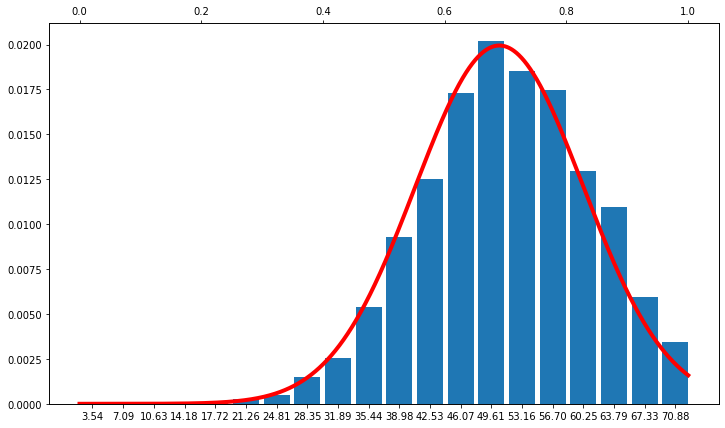

In [175]:
fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(111)
ax1.set_xticks(ModelPltData_norm[0])

ax2 = ax1.twiny()

ax1.bar(ModelPltData_norm[0], ModelPltData_norm[1], width=3)
ax2.plot(RealPltData_norm[0], RealPltData_norm[1], lw=4, c='red')

y_model_mean_norm = (ModelPltData_norm[1]*ModelPltData_norm[0]).sum()/ModelPltData_norm[0].sum()
y_model_disp_norm = ((((ModelPltData_norm[1]-y_model_mean_norm)**2)*ModelPltData_norm[0]).sum())/ModelPltData_norm[0].sum()

y_real_mean_norm = RealPltData_norm[1].mean()
y_real_disp_norm = RealPltData_norm[1].std()**2